# Mixture ManifoldHMC Last One

$$
\newcommand{\vx}{\boldsymbol{x}}
$$

Here we only keep the last sample for both Zappa and HMC at each iteration.

I MUST try the same but keeping all of the HMC. HMC leaves $\pi$ invariant afterall.

Define a parametrization $(x, y) = (x(z, t), y(z, t))$ where $z$ is the value of the level set and $t$ determines the position along the manifold in terms of an angle. Essentially we have $z\in[0, +\infty)$ and $t\in[0, 2\pi]$. In particular this parametrization is given by

$$
\begin{align*}
    x(z, t) &= a(z)\cos t \cos\theta - b(z) \sin t \sin \theta \\
    y(z, t) &= a(z)\cos t \sin\theta + b(z) \sin t \cos \theta
\end{align*}
$$

where we have $a^2 = \gamma(z)\lambda_a$ and $b^2 = \gamma(z) \lambda_b$. 

If we define ${\bf{x}} = (x, y)$ then


$$
\int_{\Omega\subseteq\mathbb{R}^2} \vx f(\vx) d\vx = \int_{[0, 2\pi] \times [0, +\infty)} \vx(z, t) f(\vx(z, t)) |J(z, t)| dz dt = \int_{[0, 2\pi] \times [0, +\infty)} \vx(z, t) z|J(z, t)| dz dt
$$

If we set 

- $\Omega := [0, 2\pi]\times [0, +\infty)\subseteq \mathbb{R}^2$ 
- $g(z, t) = \vx(z, t) z$
- and $u\equiv f$ 

by the co-area formula this is then equal to 

$$
\int_{\Omega} g(z, t) |J(z, t)| dzdt = \int_{\mathbb{R}} \left[\int_{f^{-1}(z')} g(z', t') dH(t')\right] dz'
$$

This means that if we want to compute an integral with respect to the target we get

$$
\begin{align*}
\mathbb{E}_{\pi}[\phi] 
&= \int \phi d\pi \\
&= \int_{\mathbb{R}^2} \phi(x, y) f(x,y) dxdy \\
&= \int_{[0, 2\pi]\times[0, +\infty)} \phi(z, t) f(x(z, t), y(z, t)) |J(z, t)| dzdt && \text{c.o.v.} \\
&= \int_{[0, 2\pi]\times[0, +\infty)} \phi(z, t) z |J(z, t)| dzdt  && \text{contour} \\
&= \int_{\mathbb{R}}\left[\int_{f^{-1}(z')} \phi(x, y) f(x, y) dH(x, y)\right] dz' && \text{co-area}
\end{align*}
$$

So maybe I need to divide by the Jacobian of the parametrization?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from mixture_manifoldhmc_lastone import MixtureManifoldHMC_LastOne

In [2]:
# Target Distribution 
Sigma = np.array([[1.0, 0.6], [0.6, 2.0]])        # Covariance Matrix of Target Distribution
mu = np.zeros(2)                                  # Mean of target distribution
target = multivariate_normal(mean=mu, cov=Sigma)

# Settings for sampling
n = 1            # Number of HMC samples per iteration
m = 10            # Number of Zappa samples per iteration
T = 5             # Total integration time
epsilon = 0.1    # Step size
M = np.eye(2)     # Coviariance Matrix for momentum distribution
alpha = 0.1       # Probability of using HMC
N = 20000         # Total number of samples

# Data for contour plot
xmin, xmax, xstep = -3, 3, 0.05
ymin, ymax, ystep = -3, 3, 0.05
x_grid, y_grid = np.mgrid[xmin:xmax:xstep, ymin:ymax:ystep]
contour_values = target.pdf(np.dstack((x_grid, y_grid)))

# Sample and plot
x0 = target.rvs()
samples = MixtureManifoldHMC_LastOne(
    x0, alpha=alpha, N=N, n=n, m=m, Sigma=Sigma, mu=mu, T=T, epsilon=epsilon, M=M
)

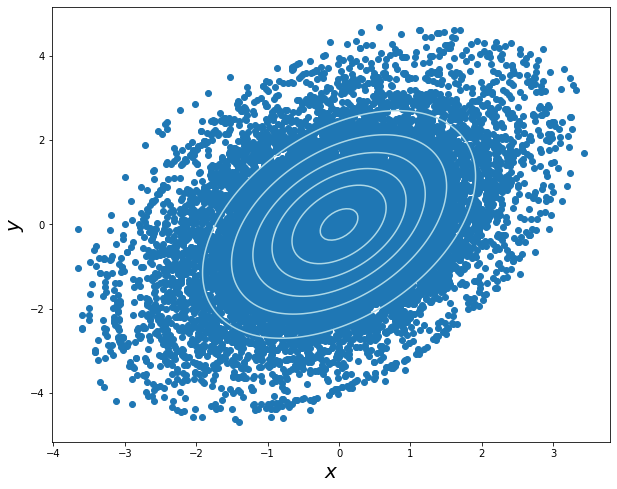

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(samples[:, 0], samples[:,1])
ax.contour(x_grid, y_grid, contour_values, colors="lightblue")
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
plt.show()

In [4]:
np.cov(samples.T)

array([[1.02822909, 0.49173989],
       [0.49173989, 1.82812985]])

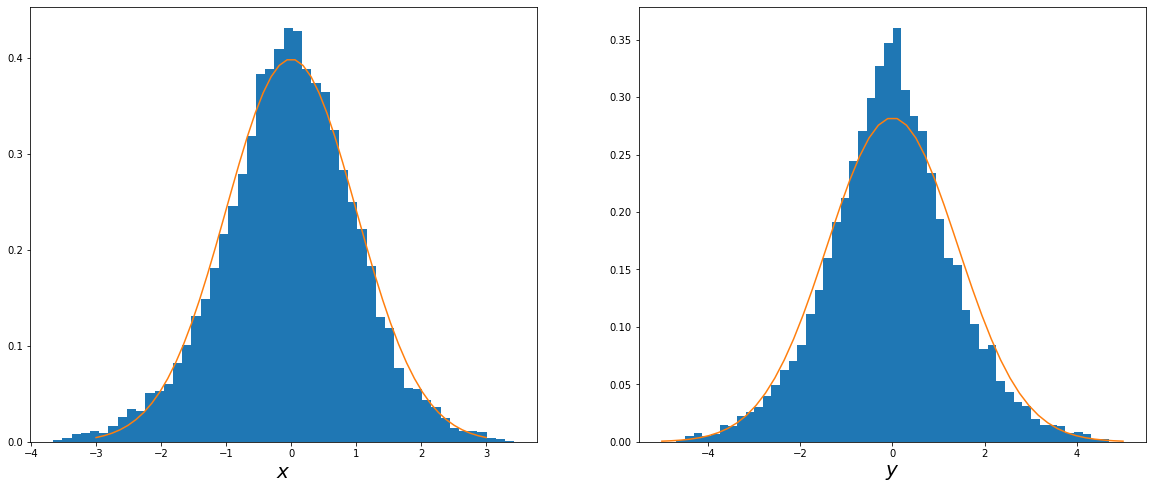

In [5]:
# marginals
marginal_x = norm(loc=mu[0], scale=np.sqrt(Sigma[0,0]))
marginal_y = norm(loc=mu[1], scale=np.sqrt(Sigma[1,1]))

# Plotting vars
xs = np.linspace(-3, 3)
ys = np.linspace(-5, 5)

fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

# X space
_ = ax[0].hist(samples[:, 0], bins=50, density=True)
ax[0].plot(xs, marginal_x.pdf(xs))
ax[0].set_xlabel(r"$x$", fontsize=20)

# Y space
_ = ax[1].hist(samples[:, 1], bins=50, density=True)
ax[1].plot(ys, marginal_y.pdf(ys))
ax[1].set_xlabel(r"$y$", fontsize=20)

plt.show()